# Reward Training Analysis - Tone novelty

In [16]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# NAc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"
# brain_region = '#15616F'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
brain_region = '#FFAF00'


save_path = r'graphs'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\RT_cohort_3\Day10\mPFC"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\RT_cohort_3\Day1\mPFC"

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"

In [18]:
exp = Reward_Training(experiment_folder_path=experiment_path, behavior_folder_path=None)

read from t=0s to t=3885.08s
read from t=0s to t=3885.08s
read from t=0s to t=3850.48s
read from t=0s to t=3850.48s
read from t=0s to t=3858.78s
read from t=0s to t=3858.78s
read from t=0s to t=3852.99s
read from t=0s to t=3852.99s


Processing

In [19]:
exp.rtc_processing() 
exp.create_base_df(experiment_path)  # Creates a base dataframe that will contain DA data 
exp.remove_specified_subjects()  # Removes subjects with bad expression or bad fiber placement
exp.extract_da_columns()  # cleans up dataframe and allocates it into a new place

Processing trial pp1-250202-105839...
Processing trial pp2-250202-105839...
Processing trial pp3-250202-093829...
Processing trial pp4-250202-093829...
Processing trial pp5-250202-054445...
Processing trial pp6-250202-054445...
Processing trial pp7-250202-042018...
Processing trial pp8-250202-042018...


DA Calculations

In [20]:
exp.find_first_port_entry_after_sound_cue().head(1)    # For each tone, fine first valid lick after reward issued
# exp.compute_closest_port_offset(PE_column='first_PE_after_sound_cue', offset_column='filtered_port_entry_offset')  # Find the port offest that aligns with the first valid lick

# Choose either standard or EI DA
# exp.compute_standard_DA()  # for all tones, calculate the standard DA response (-4s ->10s) for both tone and lick
exp.compute_EI_DA()  # for all tones, calculate the event-induced DA response (-4s ->10s) for both tone and lick


exp.compute_rtc_da_metrics().head(1)  # from the calculated DA responose, calculate the peak, area under the curve, and time to peak for both tone and lick

,subject_name,file name,trial,filtered_sound_cues,filtered_port_entries,filtered_port_entry_offset,first_PE_after_sound_cue,Tone_Time_Axis,Tone_Zscore,PE_Time_Axis,PE_Zscore,Tone AUC,Tone Max Peak,Tone Time of Max Peak,Tone Mean Z-score,PE AUC,PE Max Peak,PE Time of Max Peak,PE Mean Z-score
0,pp1,pp1-250202-105839,<trial_class.Trial object at 0x000002FB2B3D56A0>,"[279.36817152, 359.3691136, 449.36937472, 529....","[220.85779456, 223.68780288, 224.9678848, 229....","[222.61792768, 224.81780736, 229.1580928, 229....","[283.92833024, 363.3691136, 453.36937472, 533....","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[-1.0509772872004477, -1.049641767190213, -1....","[[0.0, 0.000983039979928435, 0.001966079959856...","[[-1.2734654435943789, -1.2572628056095572, -1...","[-2.995765473715481, 2.309176635706723, -3.944...","[1.2230509959905855, 1.891877958645799, 0.8386...","[0.5583563869281534, 1.9621374782659586, 3.714...","[-0.7490145313878905, 0.5774381245762484, -0.9...","[-2.954392067750564, 8.558927664714737, 1.8365...","[0.5113175246601606, 3.7689116455115235, 2.130...","[1.8746572417235257, 2.1705522756819846, 2.043...","[-0.7386883577781417, 2.139444898005578, 0.459..."


In [21]:
exp.da_df.columns 

Index(['subject_name', 'file name', 'trial', 'filtered_sound_cues',
       'filtered_port_entries', 'filtered_port_entry_offset',
       'first_PE_after_sound_cue', 'Tone_Time_Axis', 'Tone_Zscore',
       'PE_Time_Axis', 'PE_Zscore', 'Tone AUC', 'Tone Max Peak',
       'Tone Time of Max Peak', 'Tone Mean Z-score', 'PE AUC', 'PE Max Peak',
       'PE Time of Max Peak', 'PE Mean Z-score'],
      dtype='object')

In [22]:
print(exp.da_df['Tone AUC'].apply(lambda x: len(x) if isinstance(x, list) else 0))


0    40
1    40
2    40
3    40
4    41
5    41
6    41
7    41
Name: Tone AUC, dtype: int64


### Tone AUC DA Across Trials - Linear

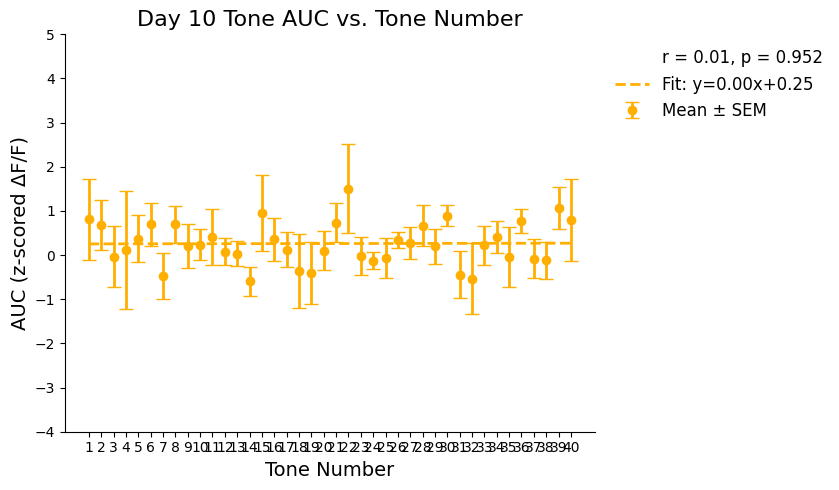

In [29]:
exp.plot_scatter('Tone AUC',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Day 10 Tone AUC vs. Tone Number'
                      ,yrange=(-4,5))

# exp.plot_sequential_event('Tone AUC',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='AUC (z-scored ΔF/F)',
#                       title='Day 10 Tone AUC vs. Tone Number',
#                       yrange=(-4,7))


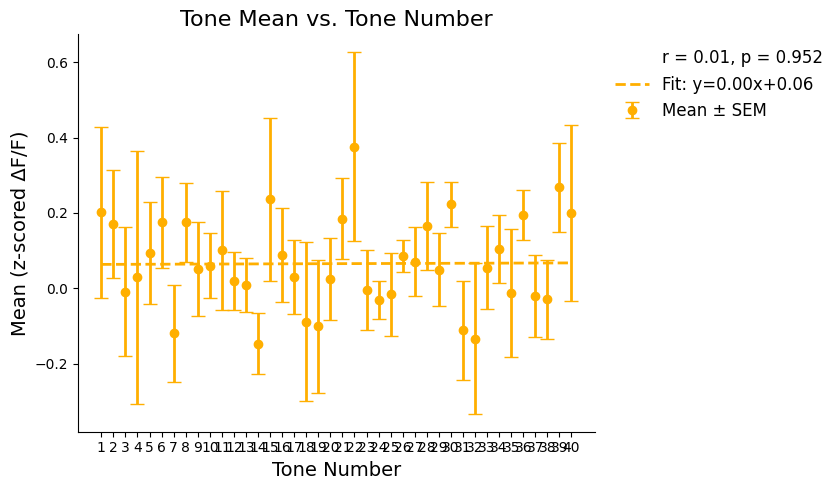

In [24]:
exp.plot_scatter('Tone Mean Z-score',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Mean (z-scored ΔF/F)',
                      title='Tone Mean vs. Tone Number')

# exp.plot_sequential_event('Tone Mean Z-score',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='Mean (z-scored ΔF/F)',
#                       title='Tone Mean vs. Tone Number')


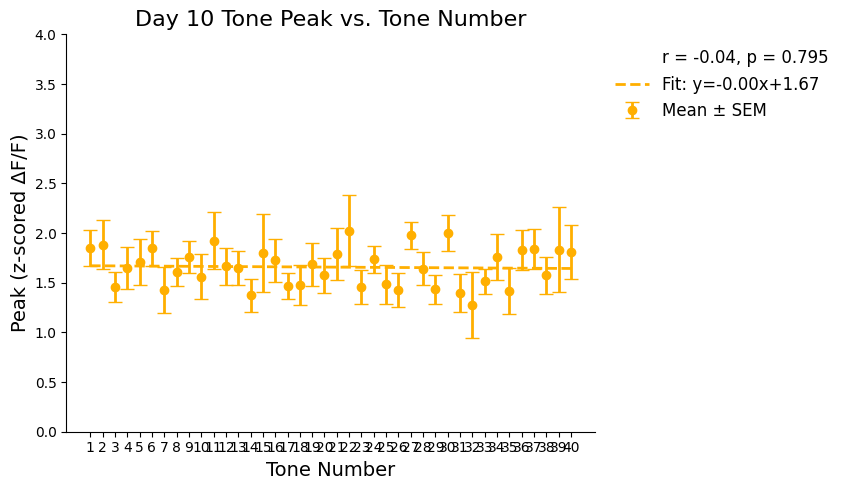

In [25]:
exp.plot_scatter('Tone Max Peak',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Peak (z-scored ΔF/F)',
                      title='Day 10 Tone Peak vs. Tone Number'
                      ,yrange=(0,4))

# exp.plot_sequential_event('Tone Max Peak',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='Peak (z-scored ΔF/F)',
#                       title='Day 10 Tone Peak vs. Tone Number')


### 1st Port Entry 

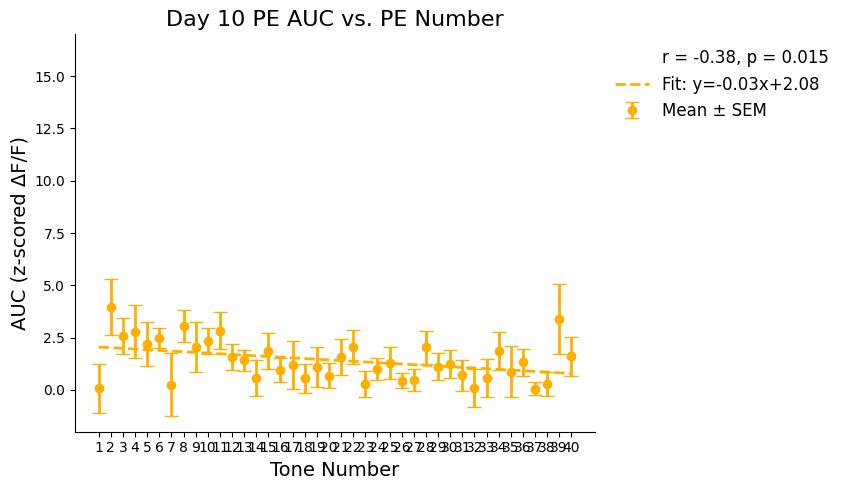

In [26]:
exp.plot_scatter('PE AUC',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Day 10 PE AUC vs. PE Number'
                      ,yrange=(-2,17))

# exp.plot_sequential_event('Tone AUC',
#                       color= brain_region,
#                       individual_dots=True,
#                       xlabel='Tone Number',
#                       ylabel='AUC (z-scored ΔF/F)',
#                       title='Day 10 Tone AUC vs. Tone Number',
#                       yrange=(-4,7))


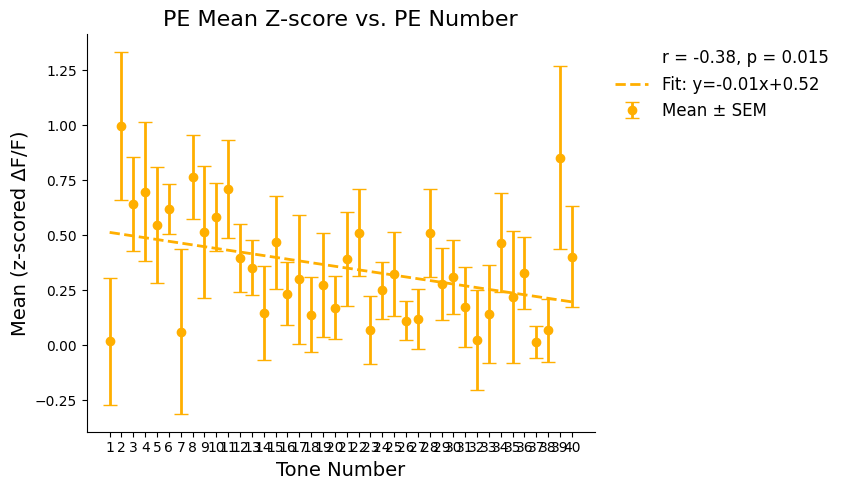

In [27]:
exp.plot_scatter('PE Mean Z-score',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Mean (z-scored ΔF/F)',
                      title='PE Mean Z-score vs. PE Number')
                    #   ,yrange=(-2.5,2.5))



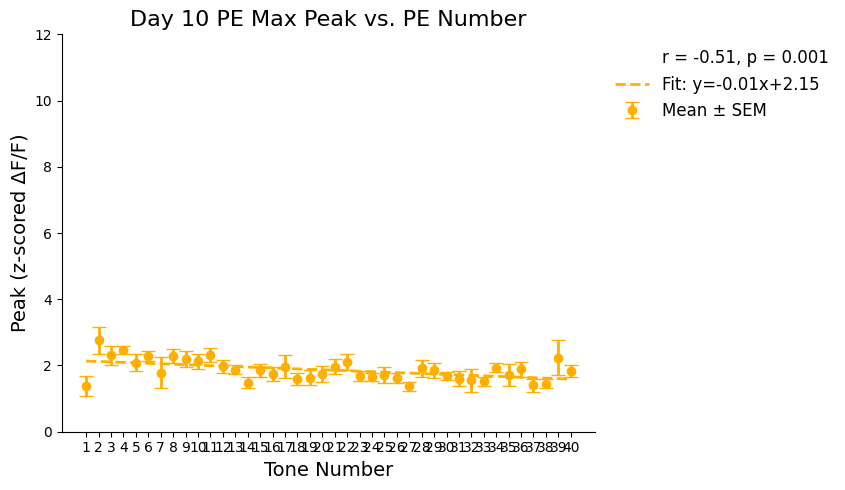

In [28]:
exp.plot_scatter('PE Max Peak',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Peak (z-scored ΔF/F)',
                      title='Day 10 PE Max Peak vs. PE Number'
                      ,yrange=(0,12))



Make sure that if there is a difference between cohorst in the number of tones that are made, it only calculates it based on the lowest amount. 